# **Практична робота №2**

Виконав: *Черевач Юрій Анатолійович,* МІТ-31

**Завдання: Прогнозування ціни житла**

Ваше завдання - побудувати модель регресії для прогнозування ціни житла на основі реально згенерованих даних.

**Крок 1: Генерація даних**

1. Згенеруйте 1000 спостережень для ознаки "Площа житла" (площа квартири в квадратних метрах) в діапазоні від 50 до 200 квадратних метрів.
    
2. Згенеруйте 1000 спостережень для ознаки "Кількість спалень" в діапазоні від 1 до 5 спалень.
    
3. Згенеруйте 1000 спостережень для ознаки "Відстань до центру міста" в діапазоні від 1 до 20 км.
    
4. Згенеруйте цільову змінну - ціну житла (в тисячах доларів) на основі ознак "Площа житла", "Кількість спалень" та "Відстань до центру міста". Модель ціни може бути, наприклад, такою: `ціна = 10 * площа + 5 * спальні - 2 * відстань + похибка`, де похибка - це випадковий шум.

In [51]:
import numpy as np 

n_samples = 1000

np.random.seed(17)

living_area = np.random.uniform(50, 200, n_samples)
bedrooms = np.random.randint(1, 5, n_samples)
distance_to_center = np.random.uniform(1, 20, n_samples)

error = np.random.normal(1, 60, n_samples)
price = 10 * living_area + 5 * bedrooms - 2 * distance_to_center + error
print(price)


[ 873.43193371 1243.3167644   666.77787542  558.92981934 1720.08706274
 1536.94551654 1425.20842651 1419.4011786   638.21241006  973.66846686
 1886.13195639  570.95632064 1821.78246837 1789.80300233  592.24730295
 1558.40089958 1293.22266831 1422.34450323 1184.55006082  905.03184138
  909.92538885 1315.6136735  1232.62593783 1780.61035388 1202.49629414
  812.96471235  805.9152399   577.57851    1570.72192646  890.94989192
  798.50544153 1724.08483126 1253.83720862  740.60868741 1311.31369397
  662.3014774  1464.12980235  649.39006904 1044.5007957  1784.12298299
 1633.08554727  550.00515108 1898.32986654 1522.78792994 1562.64709127
 1602.29544863 1813.85557937  715.62960959 1796.55262507 1816.88970433
 1802.76860686  527.9980036  1063.95420466 1064.19762455 1299.49242824
 1060.07187236  784.7001987  1973.17396764  524.32307662 1449.10700547
 1369.38655283 1860.86754838  812.6945526   570.43400471 1801.72771422
  555.3643516  1738.12582304 1561.38270458 1834.76848696 1930.86944804
  986.

**Крок 2: Розділення даних**

Розділіть ваші дані на навчальний та тестовий набори в співвідношенні 80% - 20%.

In [52]:
from sklearn.model_selection import train_test_split

X = np.column_stack((living_area, bedrooms, distance_to_center))
y = price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

**Крок 3: Побудова моделі регресії**

1. Використовуйте бібліотеку Python (наприклад, Scikit-Learn) для побудови моделі лінійної регресії.
    
2. Навчіть модель на навчальних даних, використовуючи ознаки "Площа житла", "Кількість спалень" та "Відстань до центру міста" для прогнозу ціни житла.

In [53]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

**Крок 4: Оцінка моделі**

1. Використайте модель для зроблення прогнозів на тестовому наборі.
    
2. Оцініть якість моделі за допомогою метрик, таких як середньоквадратична помилка (MSE) та коефіцієнт детермінації (R^2).

In [54]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Середньо-квадратична помилка (MSE):", mse)

r2 = r2_score(y_test, y_pred)
print("Коефіцієнт детермінації (R^2):", r2)

Середньо-квадратична помилка (MSE): 3714.237337615433
Коефіцієнт детермінації (R^2): 0.9813846416282209


**Крок 5: Візуалізація результатів**

1. Побудуйте графік, на якому відобразіть реальні ціни житла та прогнозовані моделлю ціни для тестового набору.
    
2. Додайте лінію, яка відображає ідеальні результати (реальні ціни житла) для порівняння.

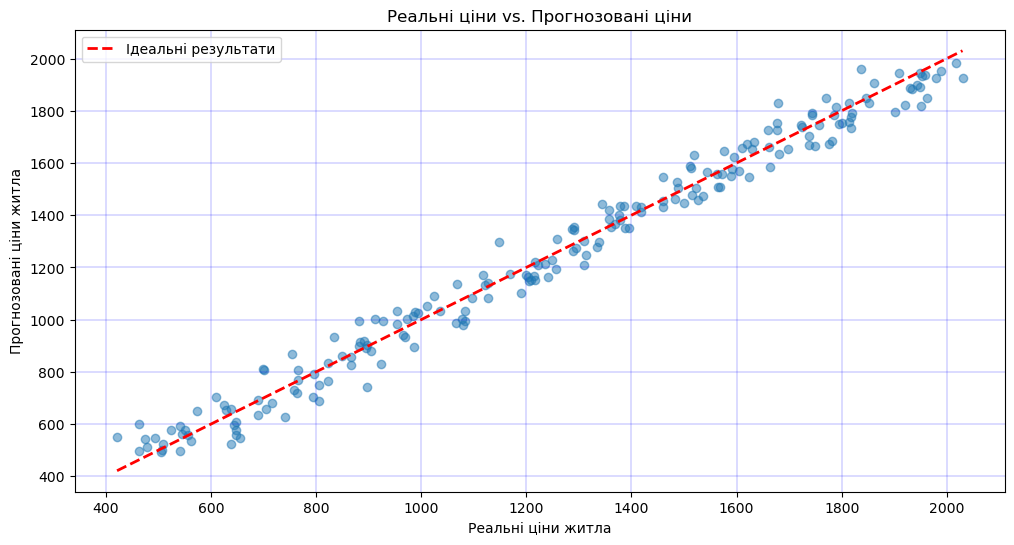

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Реальні ціни житла")
plt.ylabel("Прогнозовані ціни житла")
plt.title("Реальні ціни vs. Прогнозовані ціни")

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='red', linewidth=2, label="Ідеальні результати")

plt.grid(color='b', linestyle='-', linewidth=0.2)
plt.legend()
plt.show()


__Висновок__: На основі введених даних модель може відносно вдало прогнозувати ціни на житло. Навчившись на поданому масиві даних, модель змогла сформувати прогнозовані ціни на житло. 